In [18]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read the data
df_1 = pd.read_csv("/content/ETTh1.csv")

# print the first five columns
df_1.head()

# print the data dimension
df_1.shape

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


(17420, 8)

In [3]:
# print some info about the data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   HUFL    17420 non-null  float64
 2   HULL    17420 non-null  float64
 3   MUFL    17420 non-null  float64
 4   MULL    17420 non-null  float64
 5   LUFL    17420 non-null  float64
 6   LULL    17420 non-null  float64
 7   OT      17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [4]:
# print som statistical information about the data
df_1.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,7.375141,2.242242,4.300239,0.881568,3.066062,0.856932,13.324672
std,7.067744,2.042342,6.826978,1.809293,1.164506,0.599552,8.566946
min,-22.705999,-4.756000,-25.087999,-5.934000,-1.188000,-1.371000,-4.080000
25%,5.827000,0.737000,3.296000,-0.284000,2.315000,0.670000,6.964000
50%,8.774000,2.210000,5.970000,0.959000,2.833000,0.975000,11.396000
75%,11.788000,3.684000,8.635000,2.203000,3.625000,1.218000,18.079000
max,23.643999,10.114000,17.341000,7.747000,8.498000,3.046000,46.007000


In [5]:
# set date column as an index
df_1["date"] = pd.to_datetime(df_1["date"])
df_1.set_index("date", inplace= True)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'Oil Temperature')

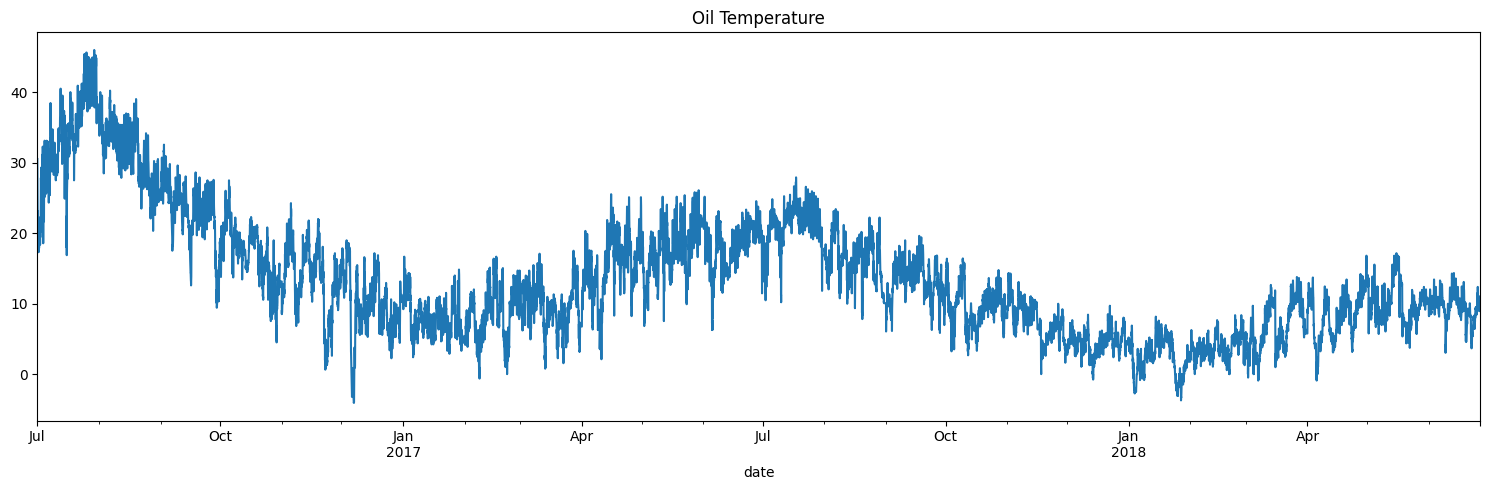

In [6]:
# display oil temperature through the time
plt.figure(figsize=(15, 5))
df_1['OT'].plot()
plt.title("Oil Temperature")
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'HUFL')

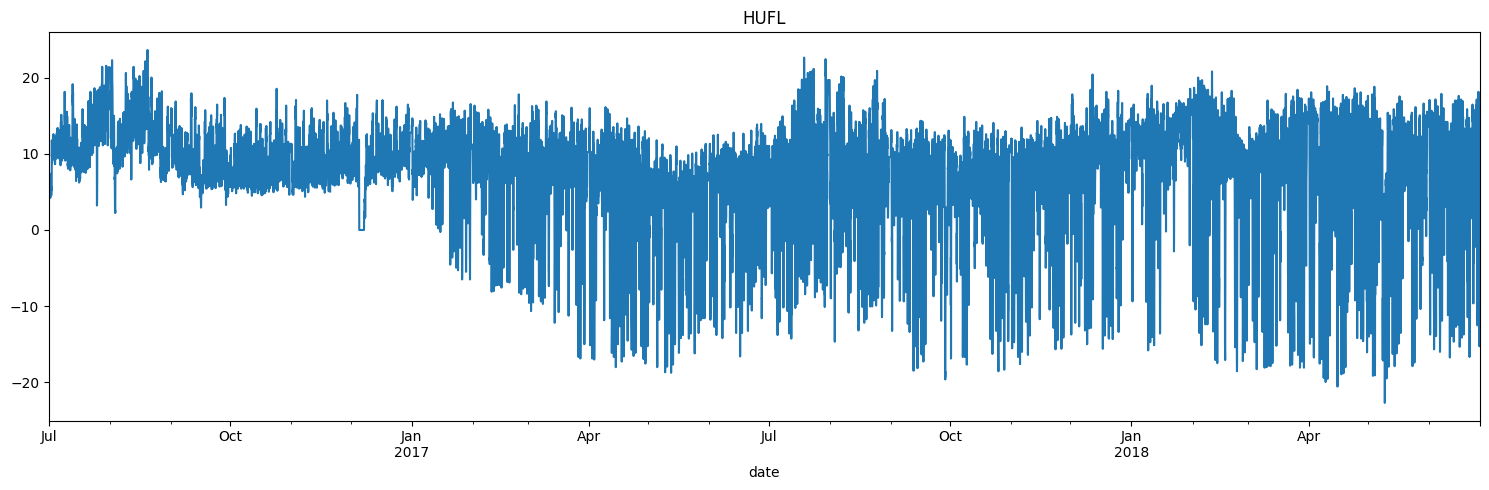

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'HULL')

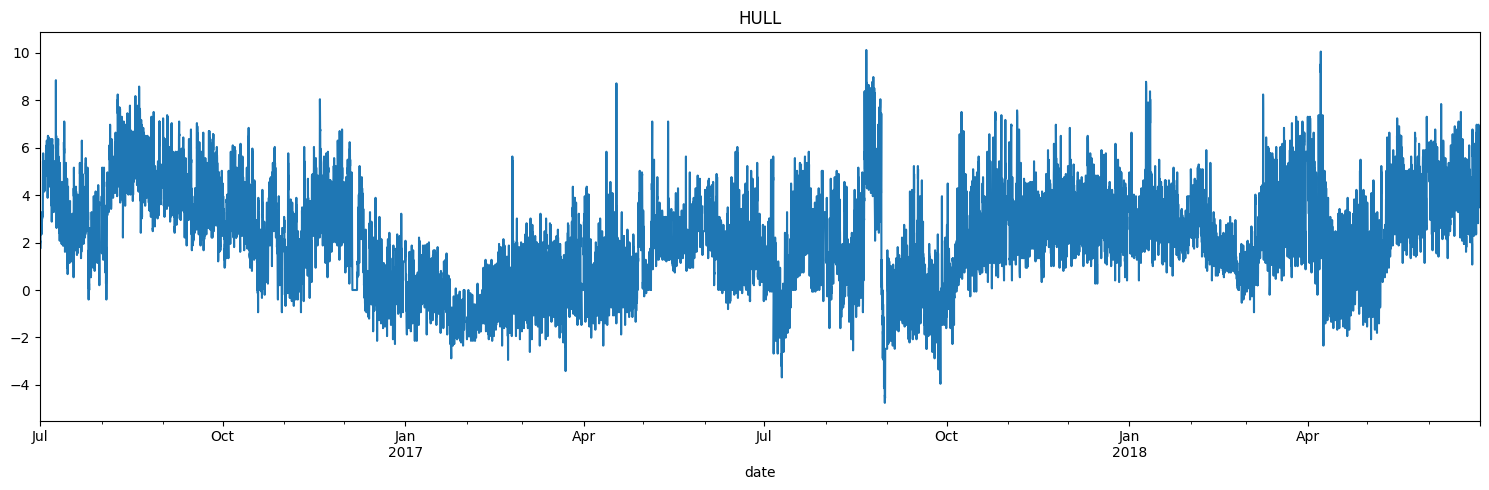

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'MUFL')

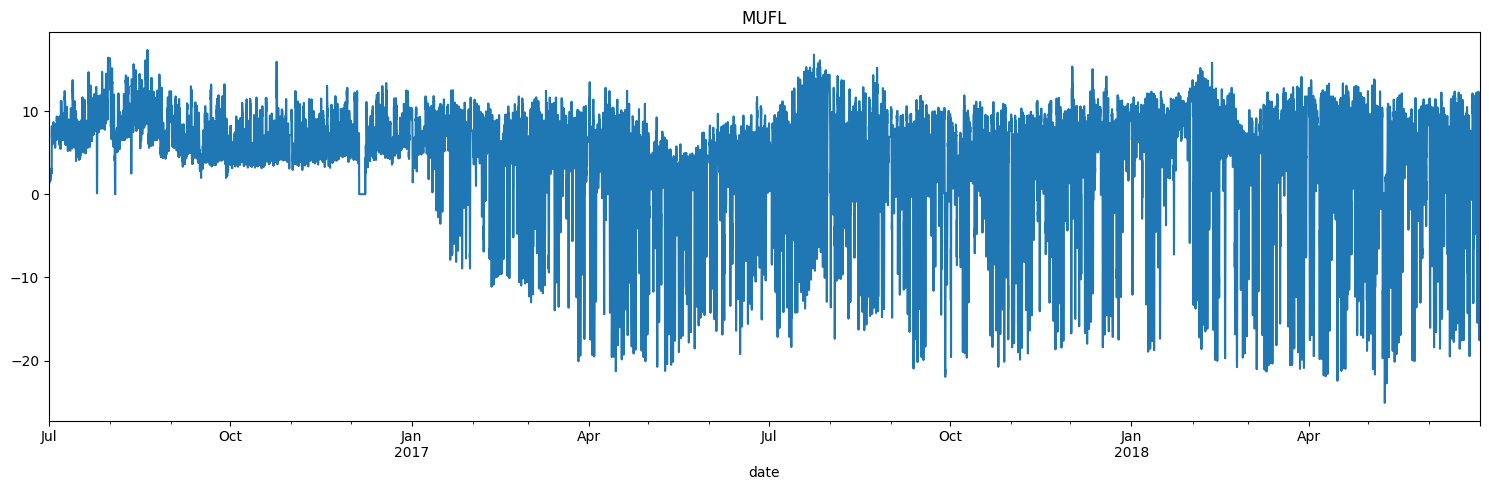

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'MULL')

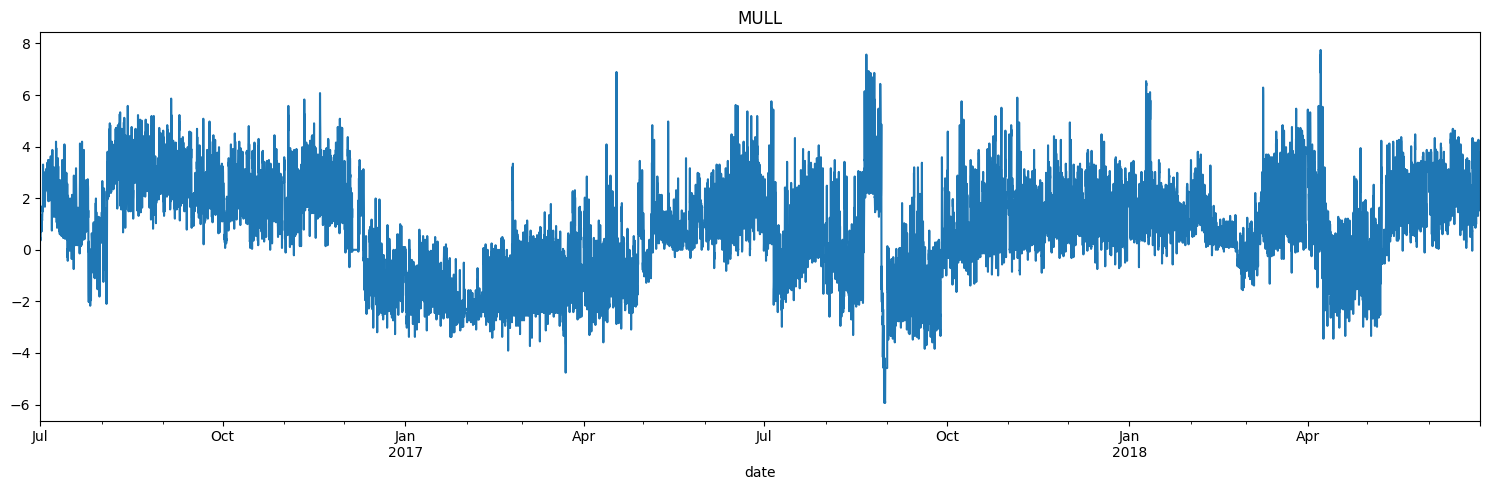

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'LUFL')

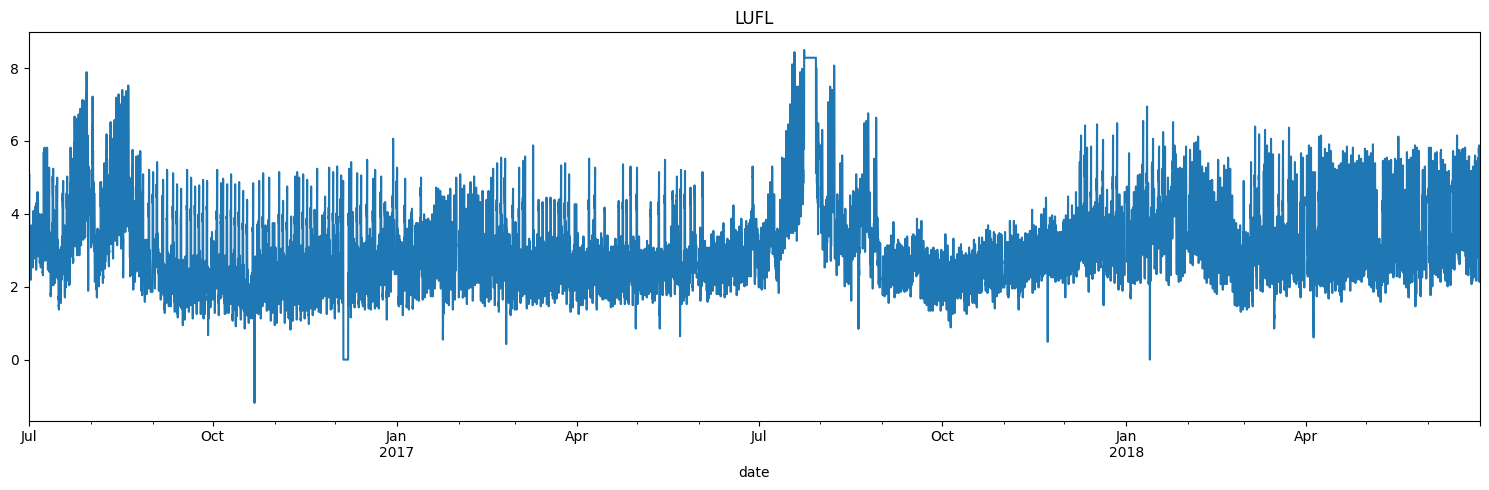

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'LULL')

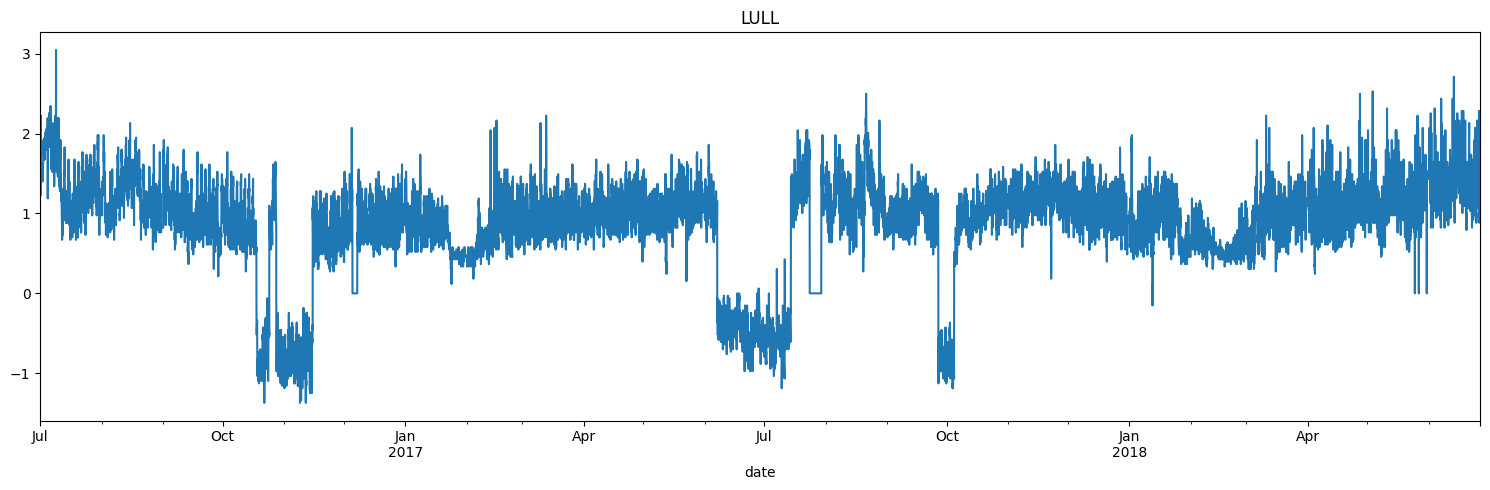

In [7]:
# display the other features through the time

columns = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']

for col in columns:
    plt.figure(figsize=(15, 5))
    df_1[col].plot()
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [8]:
# choose all features because of multi-variance

n_cols = 7
cols = list(df_1.loc[:,:])
dataset = df_1[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(17420, 7)

In [9]:
# perform minmaxscaler on the data
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
# split the data and specify the training data
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train_data = scaled_data[0:train_size, :]

train_data.shape

(13936, 7)

In [11]:
# Creating a Training set with 336 time-steps
x_train = []
y_train = []
time_steps = 336
n_cols = 7

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])

In [12]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

# print dimensions for x-train and y-train
x_train.shape , y_train.shape

((17084, 336, 7), (17084, 7))

In [14]:
# bulid the model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(256, return_sequences=True),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_cols)
])

# compile the model
model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mse")

# train the model
history = model.fit(x_train, y_train, epochs= 100,validation_split=.2, batch_size= 32)

Epoch 1/100
428/428 [==============================] - 27s 48ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2/100
428/428 [==============================] - 20s 47ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3/100
428/428 [==============================] - 19s 45ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 4/100
428/428 [==============================] - 20s 47ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5/100
428/428 [==============================] - 19s 44ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6/100
428/428 [==============================] - 19s 45ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 7/100
428/428 [==============================] - 20s 47ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 8/100
428/428 [==============================] - 

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Losses')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'loss')

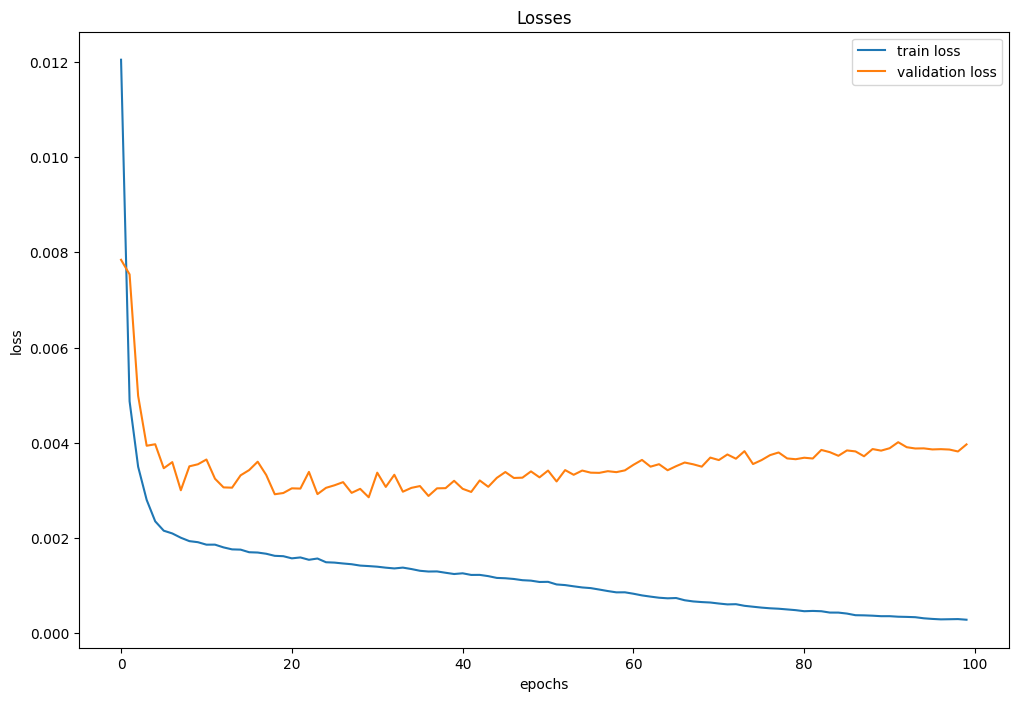

In [15]:
# plot the loss function for training and validation
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train loss','validation loss'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# prediction_length_336

In [16]:
# Creating a testing set with 336 time-steps
time_steps = 336
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [17]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

109/109 [==============================] - 3s 17ms/step


(3484, 7)

Mean Squared Error (MSE): 0.0038960446830088357
Mean Absolute Error (MAE): 0.0433751649330043


In [19]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(3484, 7)

In [20]:
# inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [21]:
# put predictions and actuals in a single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,4.482363,3.684
1,2.446202,2.210
2,0.386343,-0.711
3,0.980989,1.350
4,4.053864,4.112
...,...,...
24383,5.956814,6.183
24384,0.989639,1.564
24385,3.571946,3.716
24386,1.077780,1.462


<Figure size 1600x600 with 0 Axes>

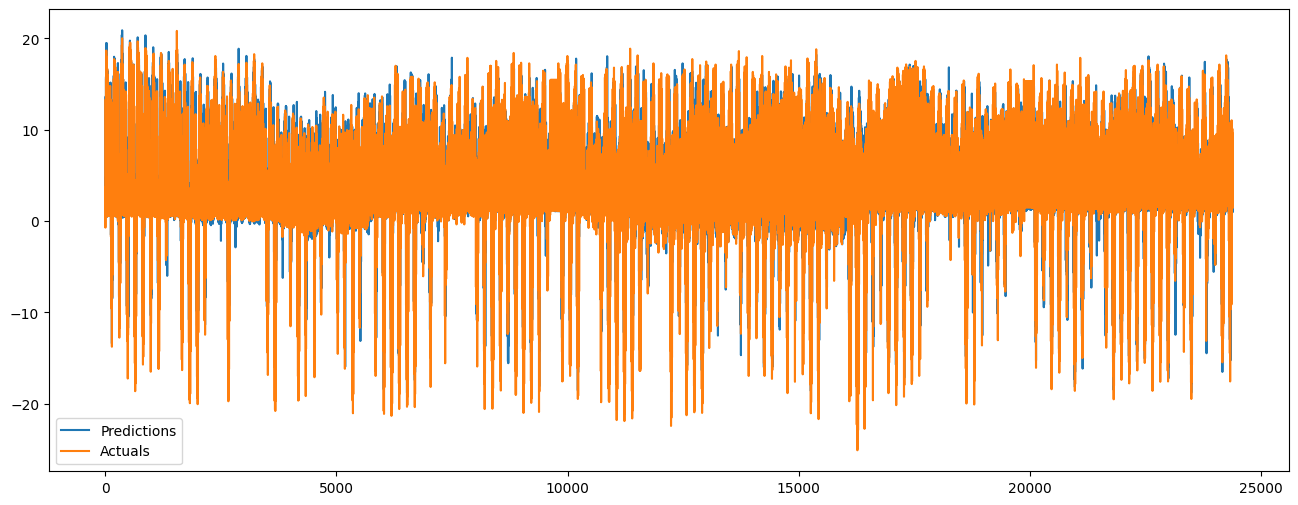

In [22]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_96

In [23]:
# Creating a testing set with 96 time-steps
time_steps = 96
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [24]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

109/109 [==============================] - 2s 8ms/step


(3484, 7)

Mean Squared Error (MSE): 0.003887959573900822
Mean Absolute Error (MAE): 0.04333227142977079


In [25]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(3484, 7)

In [26]:
# inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [27]:
# put predictions and actuals on a single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,4.546424,3.684
1,2.507019,2.210
2,0.409081,-0.711
3,1.038929,1.350
4,4.105755,4.112
...,...,...
24383,5.950339,6.183
24384,0.995794,1.564
24385,3.572286,3.716
24386,1.075021,1.462


<Figure size 1600x600 with 0 Axes>

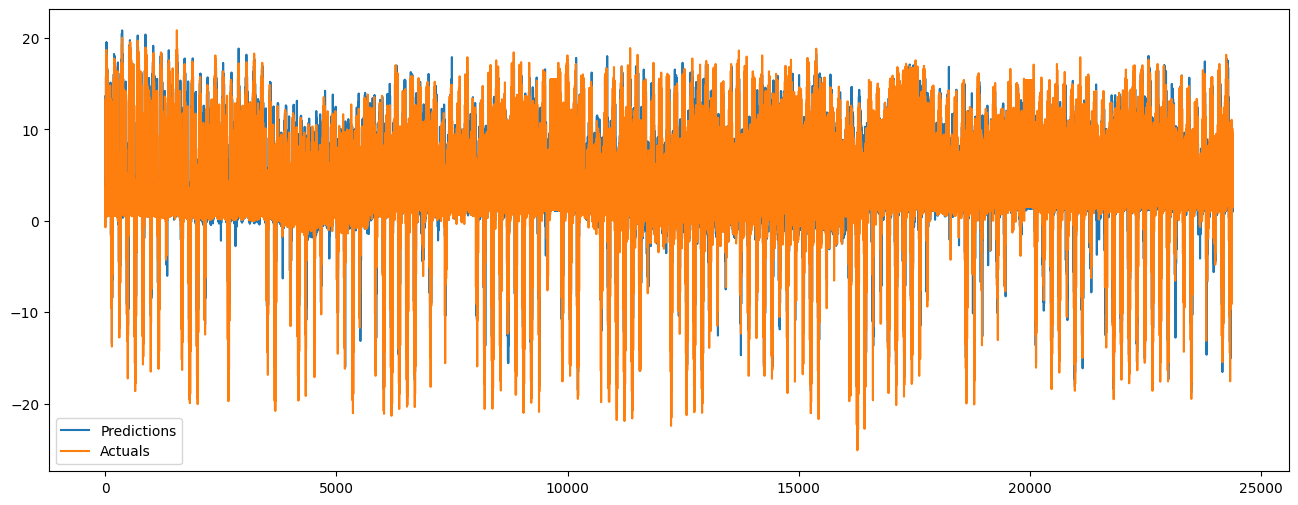

In [28]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_192

In [29]:
# Creating a testing set with 192 time-steps
time_steps = 192
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [30]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

109/109 [==============================] - 1s 12ms/step


(3484, 7)

Mean Squared Error (MSE): 0.0038962365439721355
Mean Absolute Error (MAE): 0.04337738886263544


In [31]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(3484, 7)

In [32]:
# nverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [33]:
# put predictions and actuals at one dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,4.482360,3.684
1,2.446201,2.210
2,0.386335,-0.711
3,0.980991,1.350
4,4.053865,4.112
...,...,...
24383,5.957132,6.183
24384,0.989692,1.564
24385,3.572054,3.716
24386,1.077915,1.462


<Figure size 1600x600 with 0 Axes>

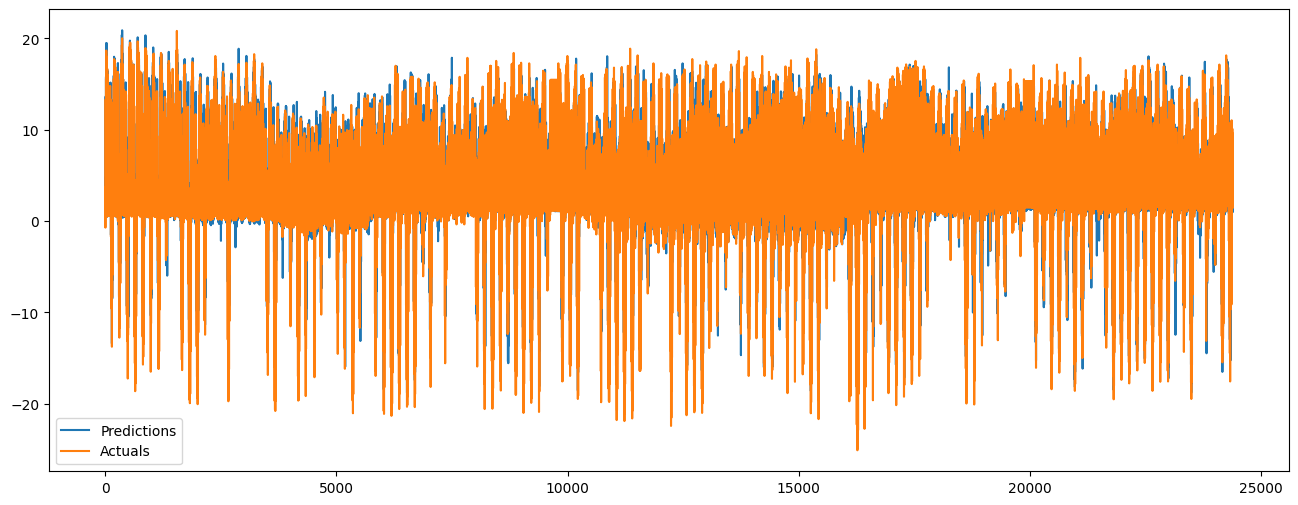

In [34]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

#prediction_length_720

In [35]:
# Creating a testing set with 720 time-steps
time_steps = 720
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [36]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

# Compute MSE and MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

109/109 [==============================] - 4s 33ms/step


(3484, 7)

Mean Squared Error (MSE): 0.0038960450931938085
Mean Absolute Error (MAE): 0.043375170936422354


In [37]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(3484, 7)

In [38]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [39]:
# put predictions and actuals at single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,4.482363,3.684
1,2.446202,2.210
2,0.386343,-0.711
3,0.980990,1.350
4,4.053864,4.112
...,...,...
24383,5.956814,6.183
24384,0.989639,1.564
24385,3.571947,3.716
24386,1.077780,1.462


<Figure size 1600x600 with 0 Axes>

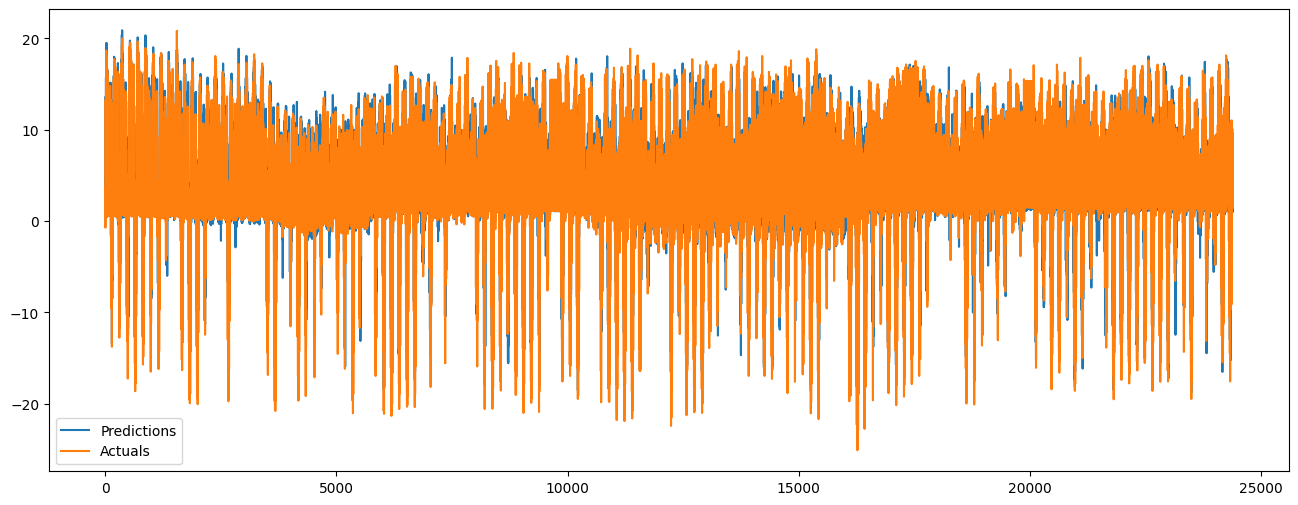

In [40]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()